## **Importing packages**

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import STOPWORDS, WordCloud

import nltk
import re

from sklearn.model_selection import train_test_split

## **Read data file**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/WELFake_Dataset.csv')
#data = pd.read_csv('/content/drive/MyDrive/Classes/Sem 2 - Winter 2024/Data Mining/WELFake_Dataset.csv')

## **Data preprocessing**

In [4]:
print(data.shape)

(72134, 4)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [6]:
data.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [7]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


### **Find missing values and replace with space**

In [8]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [9]:
data = data.fillna(' ')

In [10]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [11]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


<Axes: ylabel='count'>

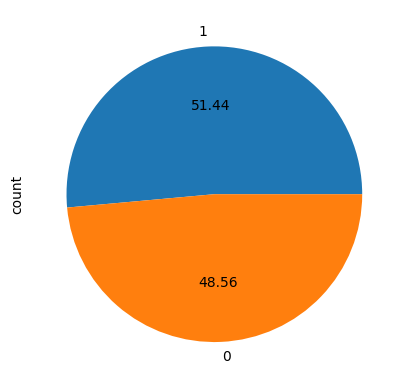

In [12]:
data['label'].value_counts().plot.pie(autopct='%.2f')

From the above graph, we can conclude that the data is balanced.

### **Combining title and text columns**

In [13]:
data['total'] = data['title'] + data['text']

In [14]:
data.head()

,Unnamed: 0,title,text,label,total
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...


### **Creating Wordcould Visuals**

In [15]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS)

In [16]:
real_words = " ".join(token.lower() for token in data[data['label'] == 1].total if token not in stopwords)
print(real_words[0:500])

law enforcement on high alert following threats against cops and whites on 9-11by #blacklivesmatter and #fyf911 terrorists [video]no comment is expected from barack obama members of the #fyf911 or #fukyoflag and #blacklivesmatter movements called for the lynching and hanging of white people and cops. they encouraged others on a radio show tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in america.one of the f***yoflag organizers


In [17]:
fake_words = " ".join(token.lower() for token in data[data['label'] == 0].total if token not in stopwords)
print(fake_words[0:500])

bobby jindal, raised hindu, uses story of christian conversion to woo evangelicals for potential 2016 bida dozen politically active pastors came here for a private dinner friday night to hear a conversion story unique in the context of presidential politics: how louisiana gov. bobby jindal traveled from hinduism to protestant christianity and, ultimately, became what he calls an “evangelical catholic.”

over two hours, jindal, 42, recalled talking with a girl in high school who wanted to “save m


In [18]:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white', stopwords=stopwords,
                      min_font_size=10).generate(real_words)

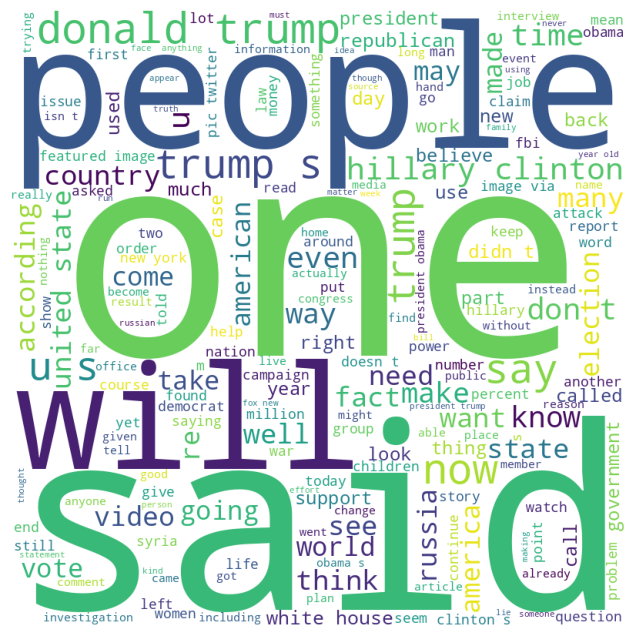

In [19]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white', stopwords=stopwords,
                      min_font_size=10).generate(fake_words)

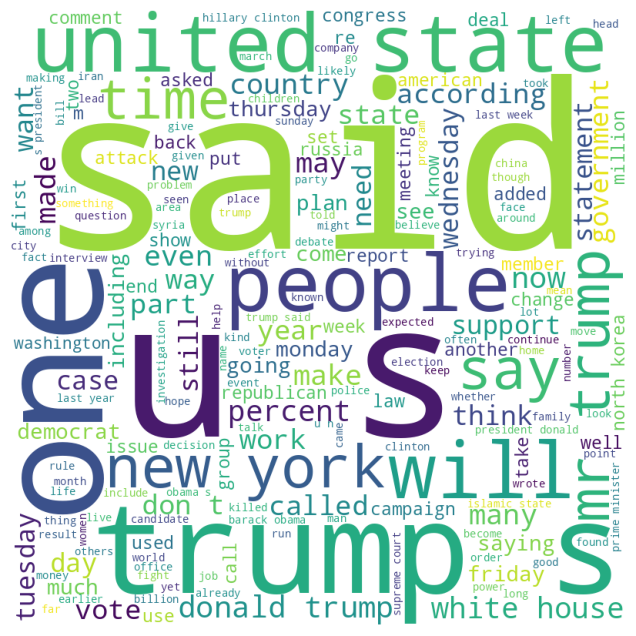

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## **Applying NLP techniques**

### Tokenize and Lemmatization

In [22]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [25]:
# Replace words from total column where it is not alphabet & spaces
data['total'] = data['total'].str.replace(r'[^\w\s]', ' ')

In [26]:
data['total'] = data['total'].apply(lambda x: ' '.join(
    lemmatizer.lemmatize(word.lower()) for word in nltk.word_tokenize(x) if word not in stopwords
))

In [27]:
text_corpus = []
for review in data['total']:
    text_corpus.append(review)

In [28]:
data.head()

,Unnamed: 0,title,text,label,total
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,law enforcement on high alert following threat...
1,1,,Did they post their votes for Hillary already?,1,did post vote hillary already ?
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,unbelievable ! obama ’ s attorney general say ...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"bobby jindal , raised hindu , us story christi..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,satan 2 : russia unvelis image terrifying new ...


In [29]:
max_length = max(len(sentence.split()) for sentence in text_corpus)

print("Maximum length of sentence:", max_length)

Maximum length of sentence: 25344


In [30]:
len(text_corpus)

72134

In [31]:
data = data[['total', 'label']]

In [32]:
data.head()

,total,label
0,law enforcement on high alert following threat...,1
1,did post vote hillary already ?,1
2,unbelievable ! obama ’ s attorney general say ...,1
3,"bobby jindal , raised hindu , us story christi...",0
4,satan 2 : russia unvelis image terrifying new ...,1


### Bag of words

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
count_vec = CountVectorizer()
count_occurs = count_vec.fit_transform(data['total'])

In [35]:
feature_names = count_vec.get_feature_names_out()
non_zero_indices = count_occurs.nonzero()
word_indices = non_zero_indices[1]
word_counts = count_occurs.data

count_occur_df = pd.DataFrame({'Word': feature_names[word_indices], 'Count': word_counts})

count_occur_df.drop_duplicates(subset='Word', inplace=True)

count_occur_df.sort_values(by='Count', ascending=False, inplace=True)

In [36]:
count_occur_df.head()

,Word,Count
9187076,oesterlund,152
7344313,voltairenet,108
7344314,article1,108
3736777,pasdaran,106
9187075,pursglove,88


### TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tf =TfidfVectorizer()
tfidf_matrix = tf.fit_transform(data['total'])
tf_feature_names = tf.get_feature_names_out()
tfidf_values = tfidf_matrix.max(axis=0).toarray()[0]
tfidf_df = pd.DataFrame({'Word': tf_feature_names, 'TF-IDF': tfidf_values})
tfidf_df = tfidf_df.sort_values(by='TF-IDF', ascending=False)
print(tfidf_df)

                 Word    TF-IDF
52413            cool  1.000000
26647        baldegar  1.000000
35503         brainer  1.000000
36951       brilliant  1.000000
106486       innocent  1.000000
...               ...       ...
245871      идеологии  0.001488
257788   спецслужбами  0.001488
251937        переход  0.001488
245873  идеологически  0.001488
259355        ужасная  0.001488

[264646 rows x 2 columns]


### **Train-Test Split**

In [39]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['label'], test_size=0.3, random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50493, 264646)
(21641, 264646)
(50493,)
(21641,)


## **Data Modeling**

### MultinomialNB

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Naive Bayes Accuracy: 0.88
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     10613
           1       0.87      0.89      0.88     11028

    accuracy                           0.88     21641
   macro avg       0.88      0.88      0.88     21641
weighted avg       0.88      0.88      0.88     21641

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     10613
           1       0.87      0.89      0.88     11028

    accuracy                           0.88     21641
   macro avg       0.88      0.88      0.88     21641
weighted avg       0.88      0.88      0.88     21641



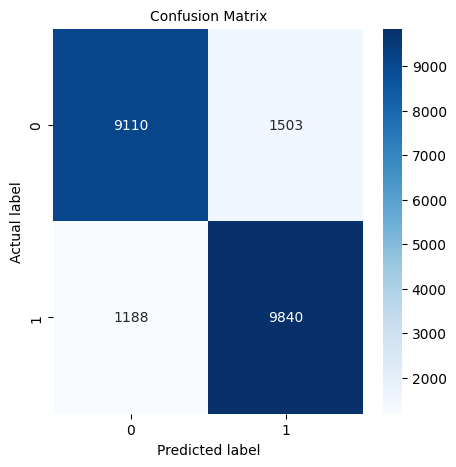

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5,5))
sns.heatmap(nb_conf_matrix,annot=True,fmt='d',cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 10);
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

### Logistic Regression

In [44]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Making predictions
predictions = logreg.predict(X_test)

# Mapping predicted labels to meaningful categories
pred_labels = ['Fake' if label == 0 else 'Real' for label in predictions]

# Counting occurrences of each label
label_counts = pd.Series(pred_labels).value_counts()

# Printing label counts
print(label_counts)

Real    11243
Fake    10398
Name: count, dtype: int64


Logistic Regression Accuracy: 0.95
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     10613
           1       0.95      0.96      0.95     11028

    accuracy                           0.95     21641
   macro avg       0.95      0.95      0.95     21641
weighted avg       0.95      0.95      0.95     21641

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     10613
           1       0.95      0.96      0.95     11028

    accuracy                           0.95     21641
   macro avg       0.95      0.95      0.95     21641
weighted avg       0.95      0.95      0.95     21641



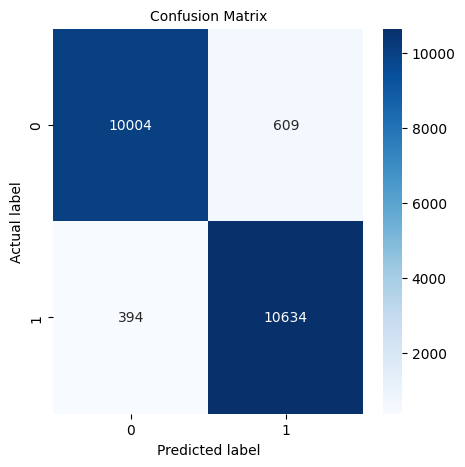

In [45]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_logreg = accuracy_score(y_test, predictions)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

# Display a classification report with precision, recall, and F1-score
print("Logistic Regression Classification Report:\n", classification_report(y_test, predictions))

lg_conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(lg_conf_matrix,annot=True,fmt='d',cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 10);
print("Classification Report:\n", classification_report(y_test, predictions))

### Random Forest

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     10613
           1       0.93      0.95      0.94     11028

    accuracy                           0.94     21641
   macro avg       0.94      0.94      0.94     21641
weighted avg       0.94      0.94      0.94     21641



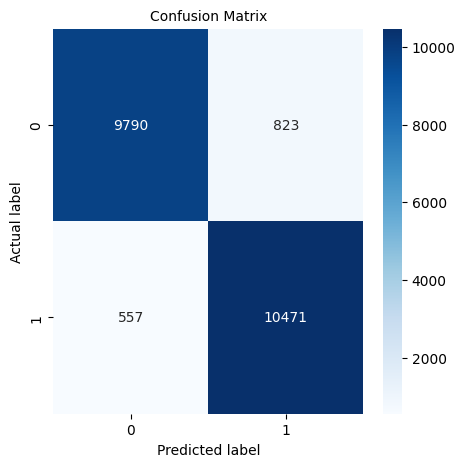

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

rf_conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(rf_conf_matrix, annot=True, fmt=".0f",cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 10);
print("Classification Report:\n", classification_report(y_test, y_pred))


### Classifying articles using Logistic Regression




In [84]:
def classify_articles(test_articles):
    test_articles_tfidf = tf.transform(test_articles)
    final_predictions = logreg.predict(test_articles_tfidf)
    pred_labels = ['Fake' if label == 0 else 'Real' for label in predictions]
    for article, label in zip(test_articles, pred_labels):
        print(f'Article: "{article[:60]}..." Prediction: {label}')

Testing Real and Fake Articles

In [85]:
test_news_articles = ["i was transformed by the best cult ever  michigan football",                                                        #Real
                      "michigan won a title  this school spent millions to make sure it never happens again",                              #Real
                      "a story circulated that pope francis made an unprecedented and shocking endorsement of donald trump for president", #Fake
                      "fred rogers served as a sniper during the vietnam war and had a large number of confirmed kills",                   #Fake
                      "the eiffel tower is to be moved to italy this weekend, according to the italy times"]                               #Fake
classify_articles(test_news_articles)

Article: "i was transformed by the best cult ever  michigan football..." Prediction: Real
Article: "michigan won a title  this school spent millions to make sur..." Prediction: Real
Article: "a story circulated that pope francis made an unprecedented a..." Prediction: Fake
Article: "fred rogers served as a sniper during the vietnam war and ha..." Prediction: Fake
Article: "the eiffel tower is to be moved to italy this weekend, accor..." Prediction: Real


The model was able to classify 4/5 samples accurately.